In [149]:
# In[1]: Setup
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

sys.path.append(os.path.join(os.getcwd(), 'Python'))
data_folder = os.path.join(os.getcwd(), 'Data')
output_folder = os.path.join(os.getcwd(), 'Output')

import preprocessing
import visualisation

# In[2]: Load and preprocess data
df = preprocessing.load_and_preprocess_data(data_folder)
start_index = df.columns.get_loc('Earnings estimate revisions')
relevant_cols = df.columns[start_index:-1]

# In[3]: Generate reports
preprocessing.generate_reports(df, relevant_cols, output_folder)

All dates have at least 500 stocks.
LaTeX table written to: /Users/danielasselbergs/Downloads/Github/Output/rbics_economy.tex
LaTeX table written to: /Users/danielasselbergs/Downloads/Github/Output/rbics_sector.tex
LaTeX table written to: /Users/danielasselbergs/Downloads/Github/Output/columns.tex
LaTeX table written to: /Users/danielasselbergs/Downloads/Github/Output/rbics.tex
LaTeX table written to: /Users/danielasselbergs/Downloads/Github/Output/missing_values_period.tex
LaTeX table written to: /Users/danielasselbergs/Downloads/Github/Output/missing_values_sector.tex


In [150]:
# In[4]: Run EDA
visualisation.run_navigation(df, relevant_cols)

In [151]:
# In[5]: Adjust dataframe by making some columns logarithmic
df_adjusted = preprocessing.adjust_dataframe(df, relevant_cols, skew_threshold=1.0)

Column 'Earnings estimate revisions' left unchanged (skewness = 0.16).
Column 'Earnings Estimate Stability' transformed using sign-preserving log₂ (skewness = 61.31).
Column 'Asset turnover' transformed using sign-preserving log₂ (skewness = 2.93).
Column 'Inventory turnover' transformed using sign-preserving log₂ (skewness = 47.84).
Column 'Revenue / Employee' transformed using sign-preserving log₂ (skewness = 26.07).
Column 'R&D to book value' transformed using sign-preserving log₂ (skewness = 55.77).
Column 'Dividend payout ratio' transformed using sign-preserving log₂ (skewness = 226.26).
Column 'Analyst Expected Long Term Growth %' transformed using sign-preserving log₂ (skewness = 5.54).
Column 'Stable EBITDA Growth Rate' transformed using sign-preserving log₂ (skewness = 14.13).
Column 'Stable Sales Growth Rate' transformed using sign-preserving log₂ (skewness = 12.88).
Column 'Depreciation & Amortization Ratio' transformed using sign-preserving log₂ (skewness = 14.52).
Column '

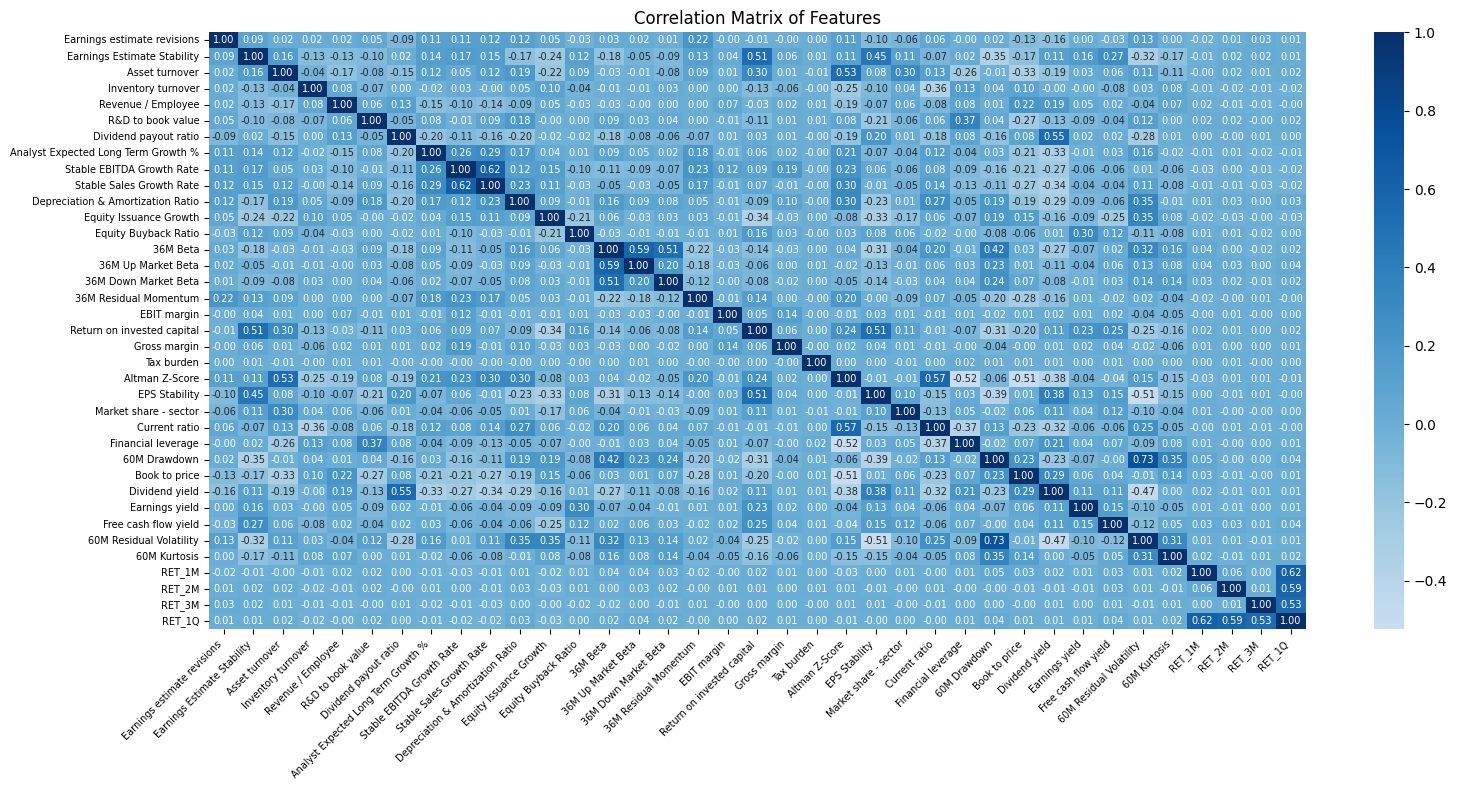

In [152]:
visualisation.plot_correlation_matrix(df_adjusted, relevant_cols)

In [153]:
preprocessing.generate_summary_statistics(df_adjusted, relevant_cols, output_folder)

LaTeX table written to: /Users/danielasselbergs/Downloads/Github/Output/summary_stats.tex


/Users/danielasselbergs/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


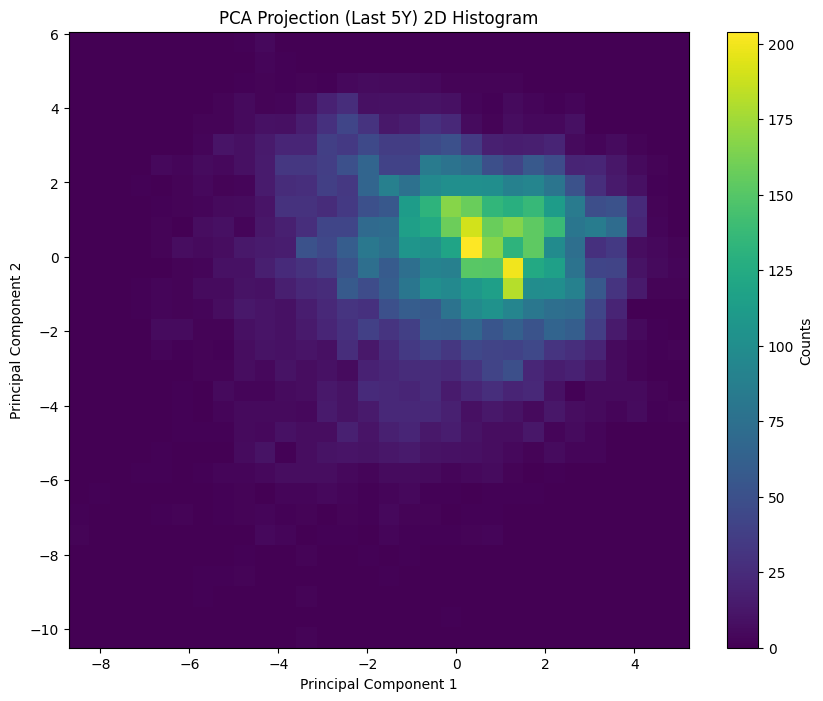

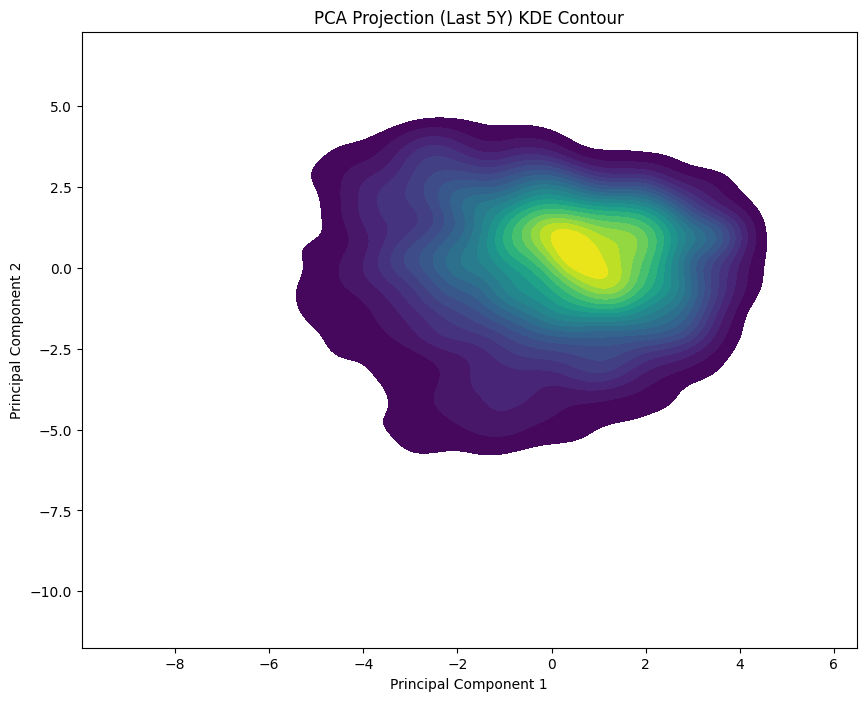

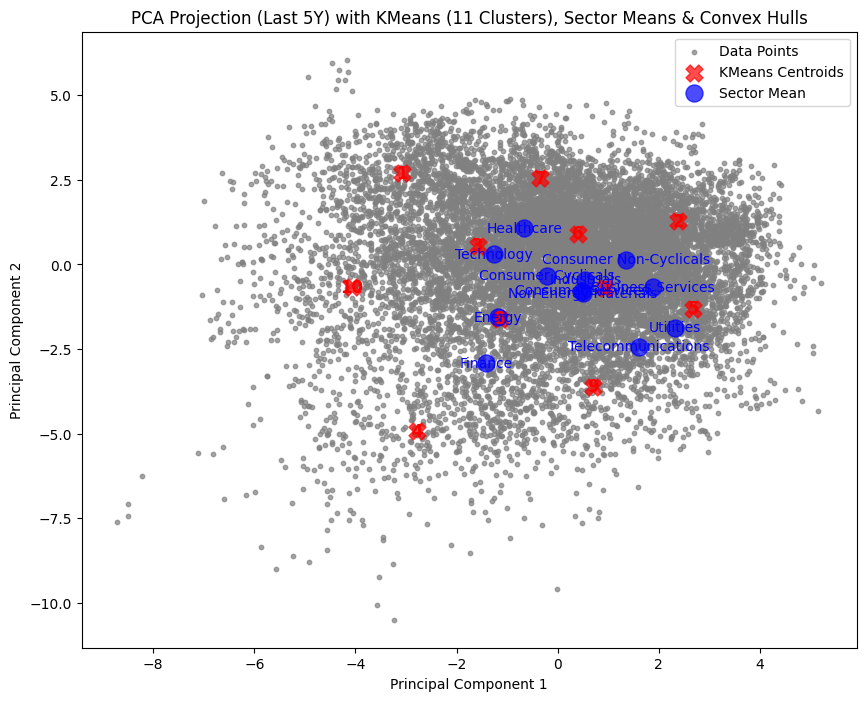

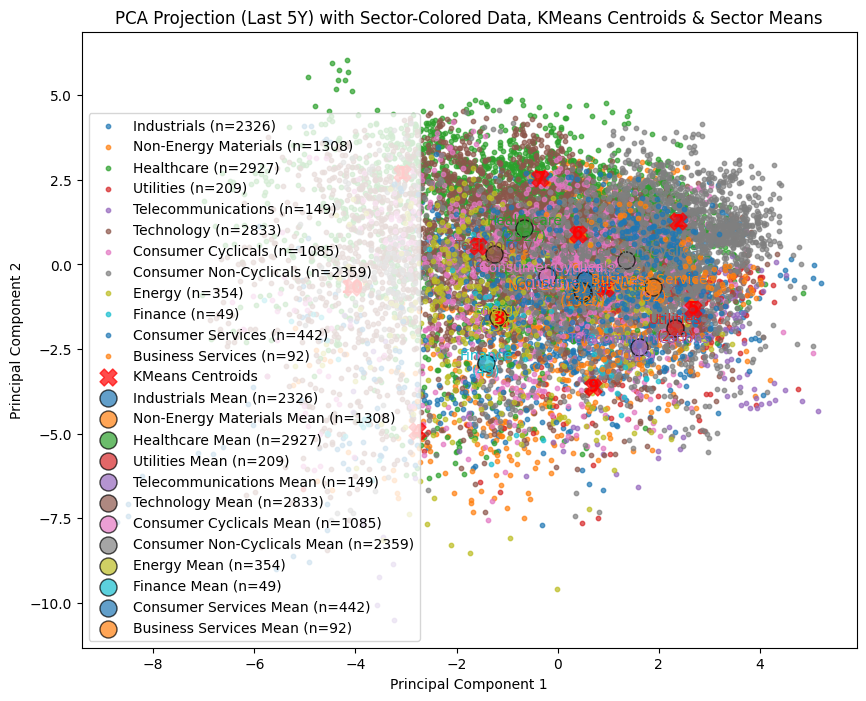

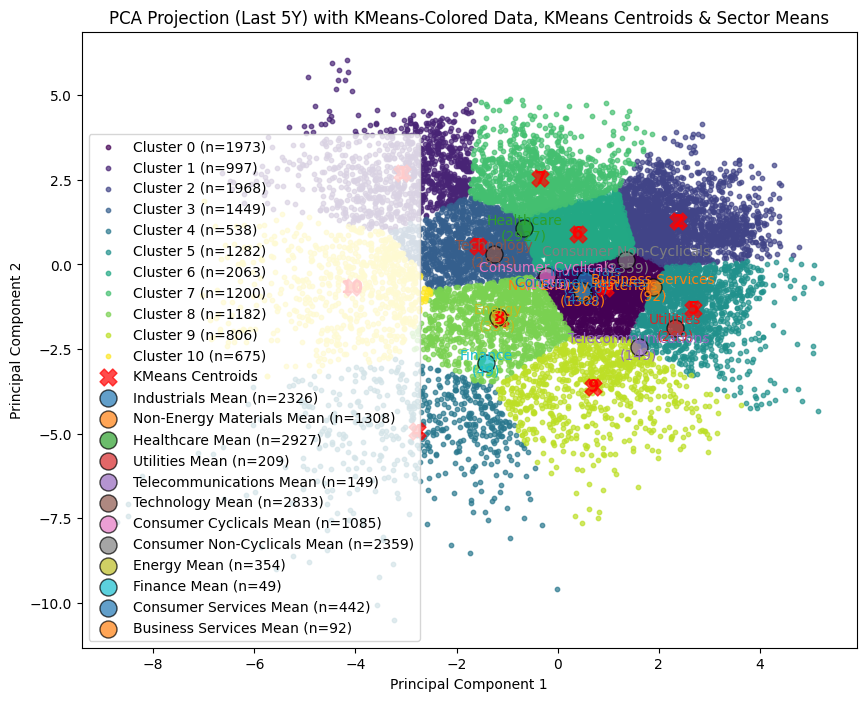

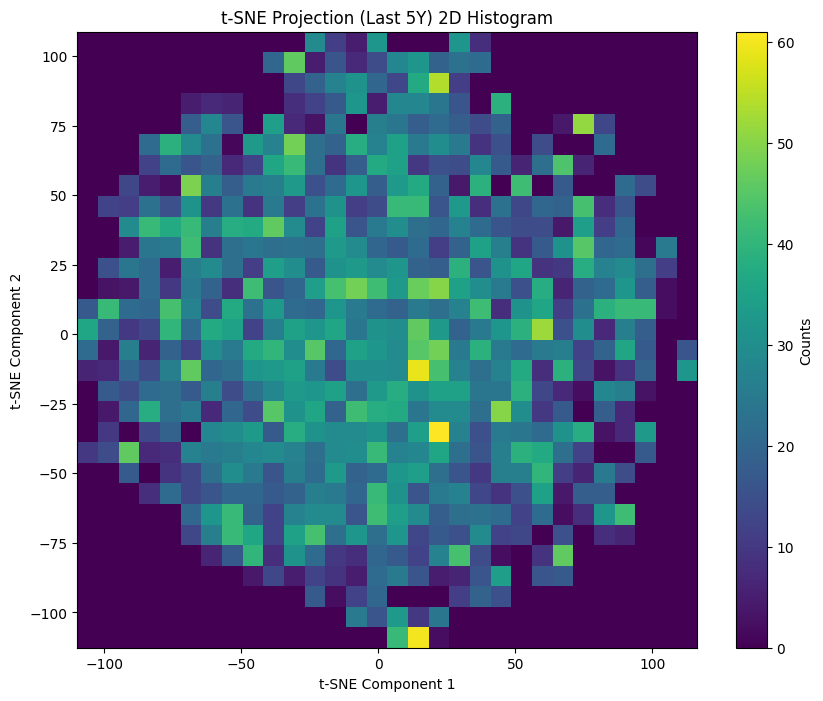

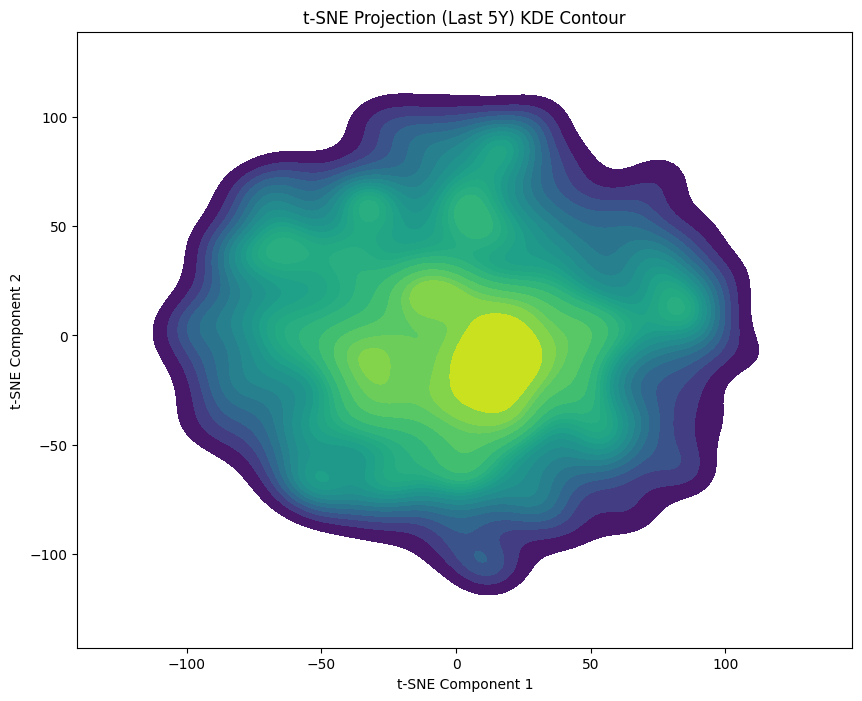

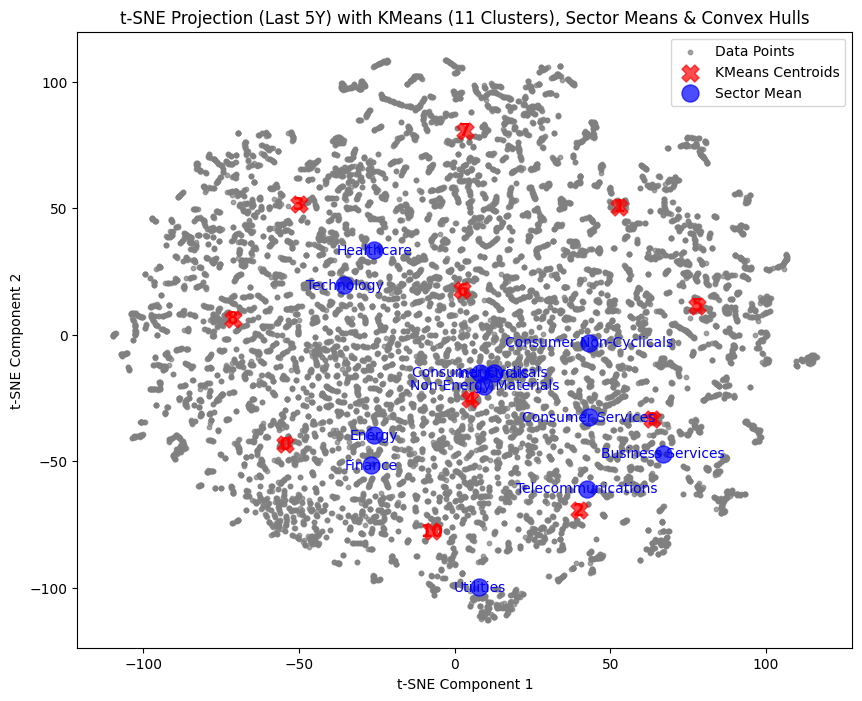

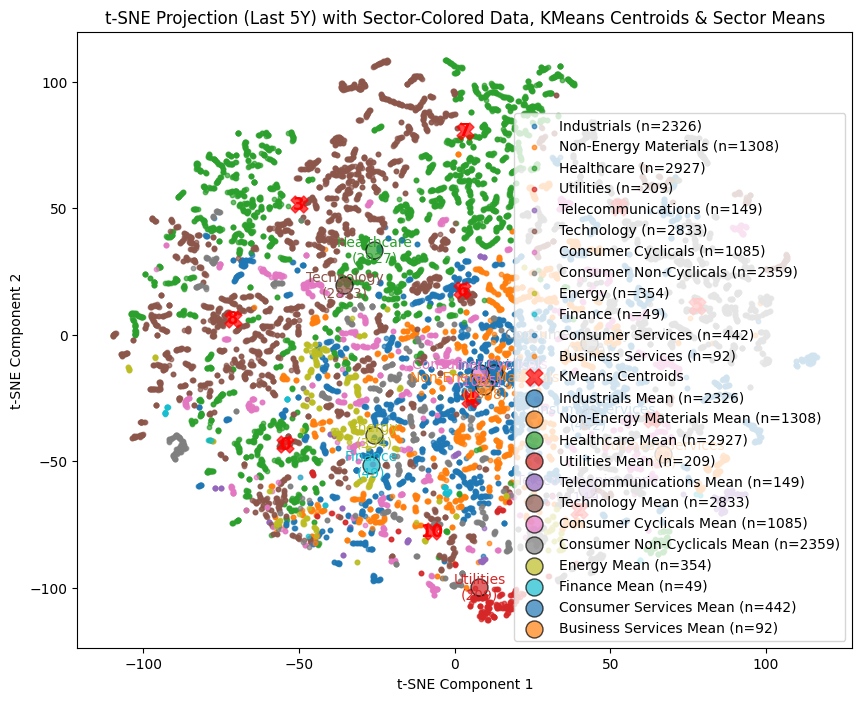

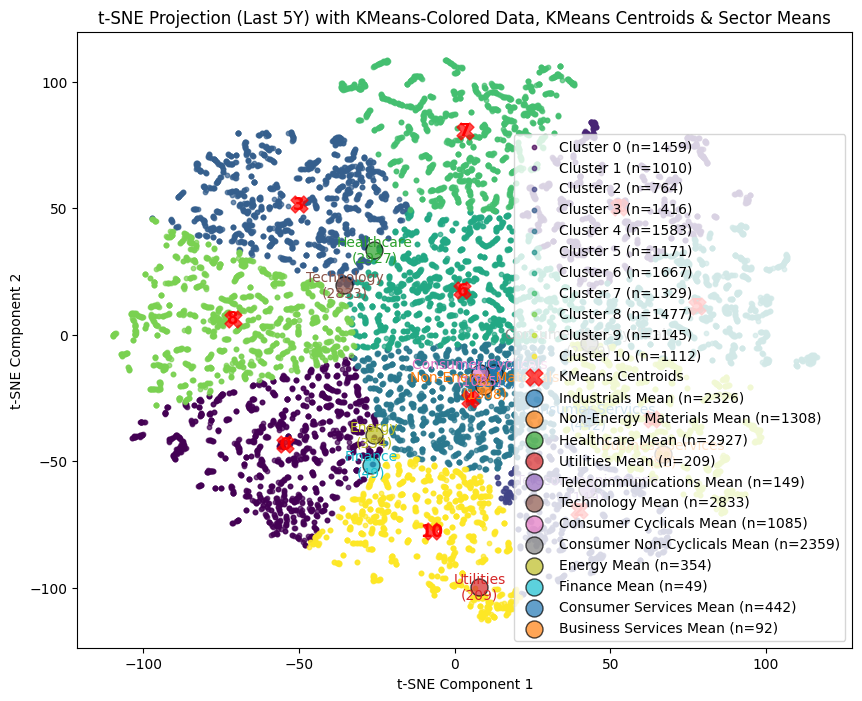

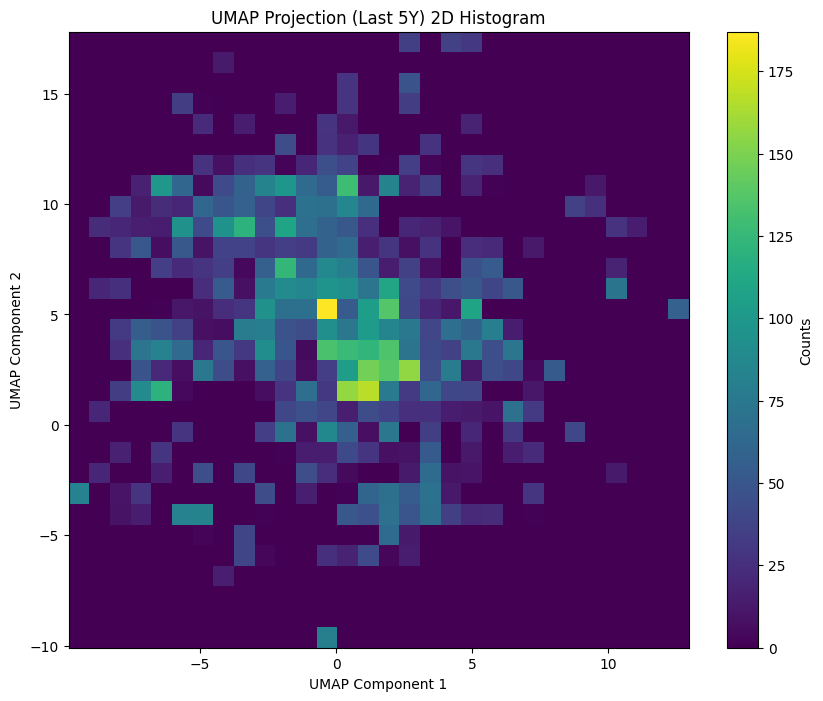

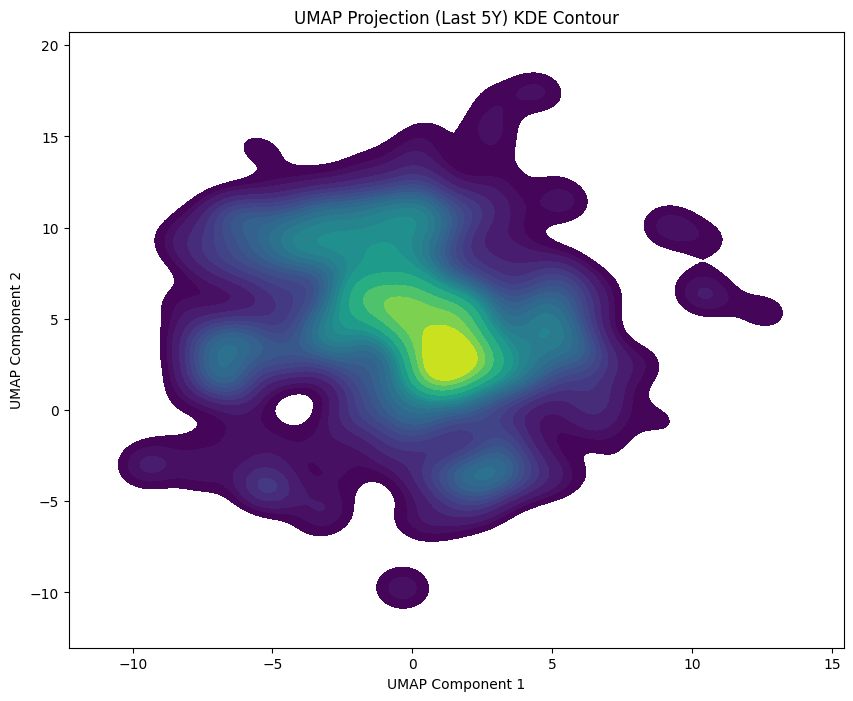

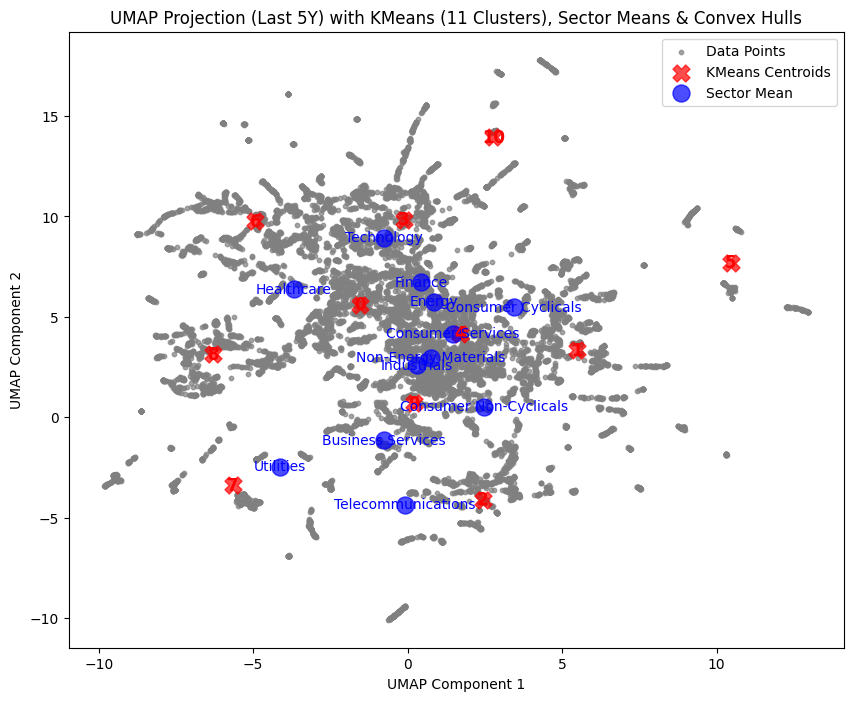

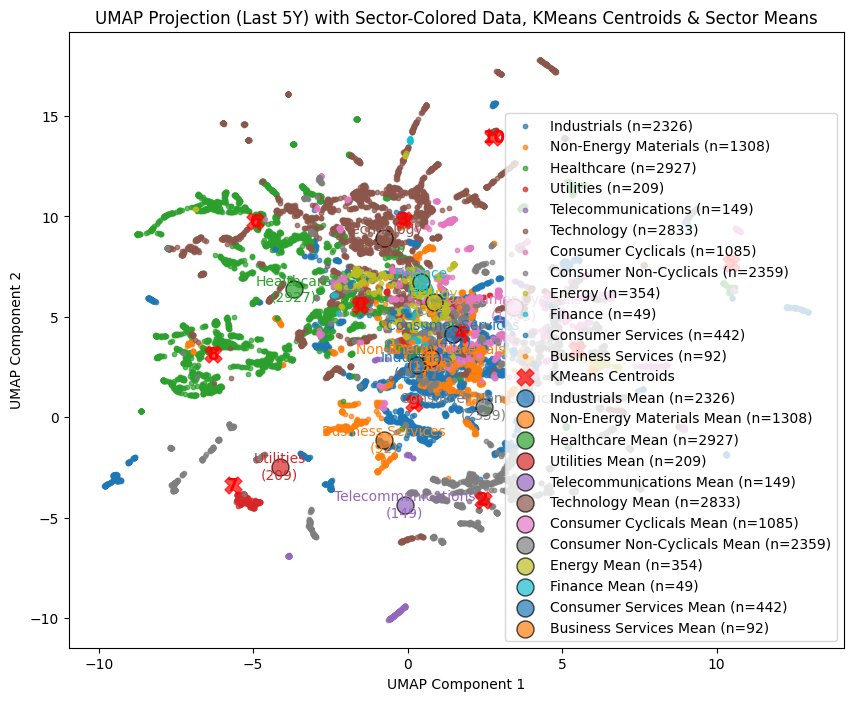

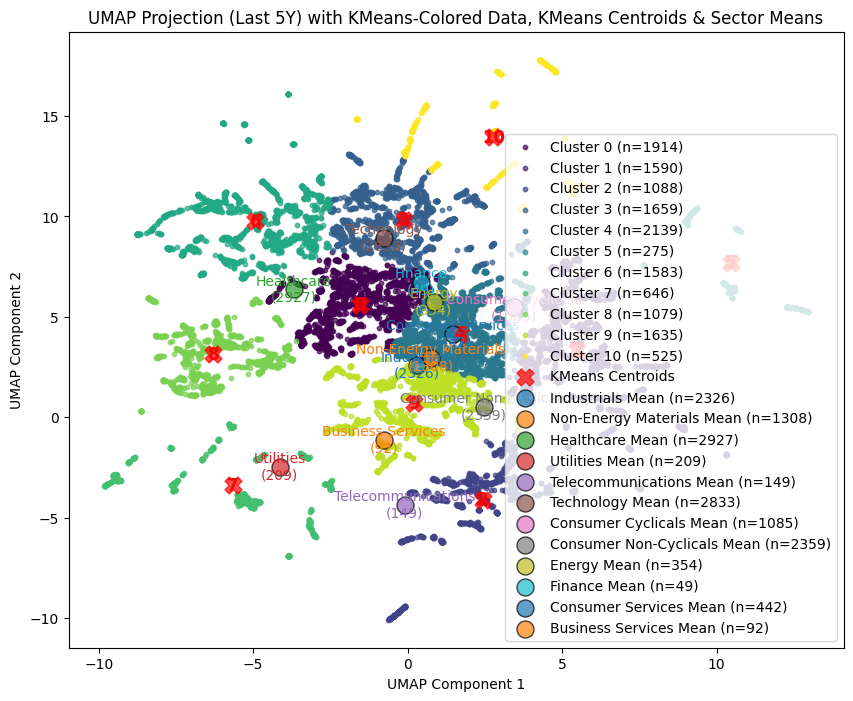

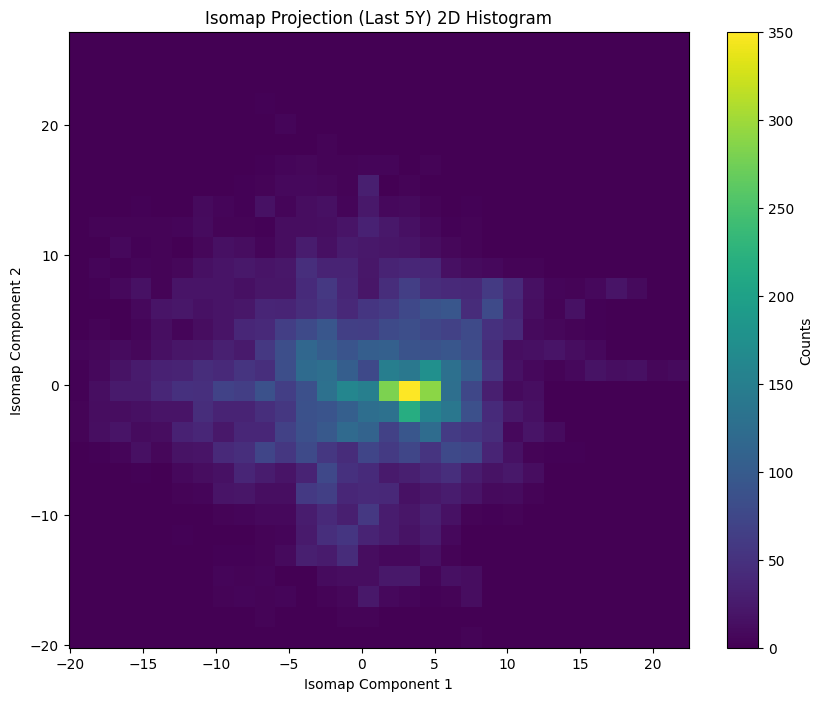

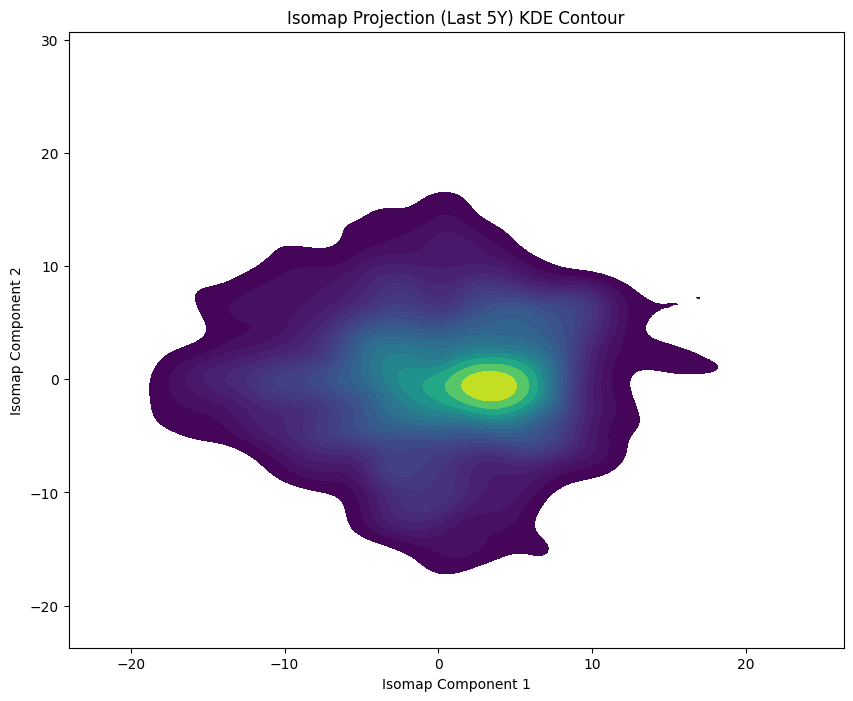

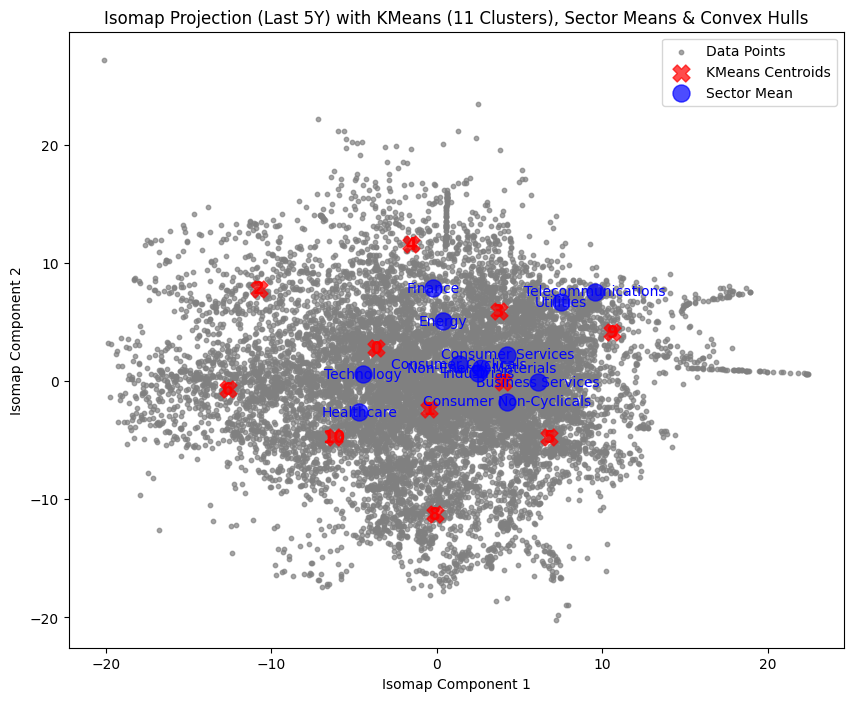

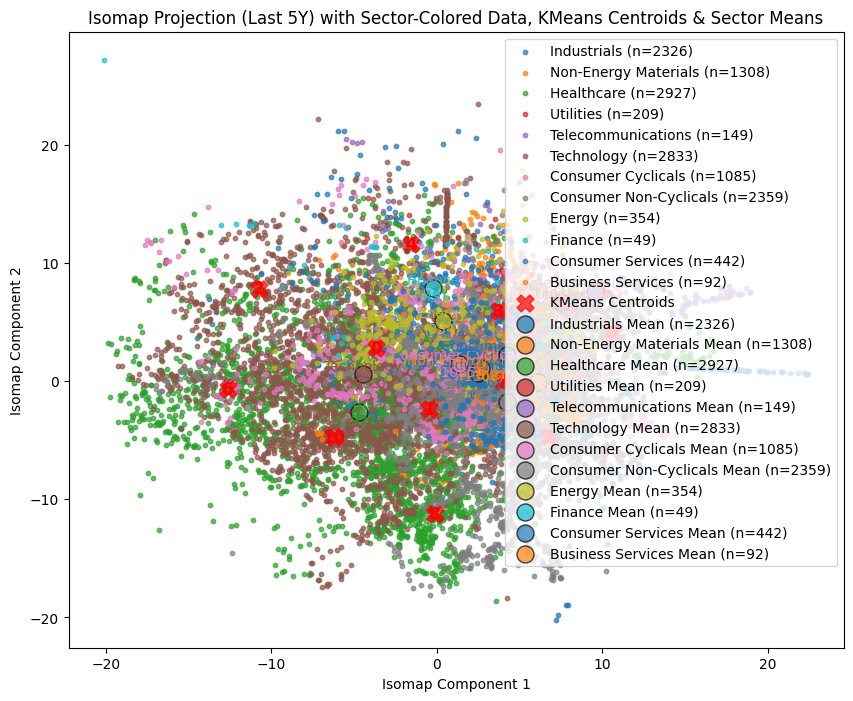

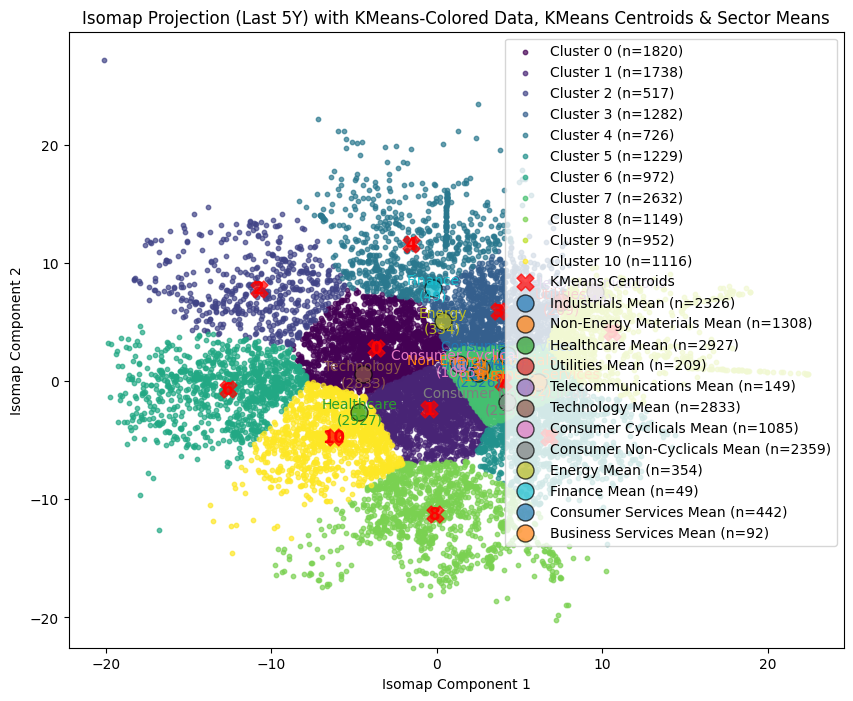

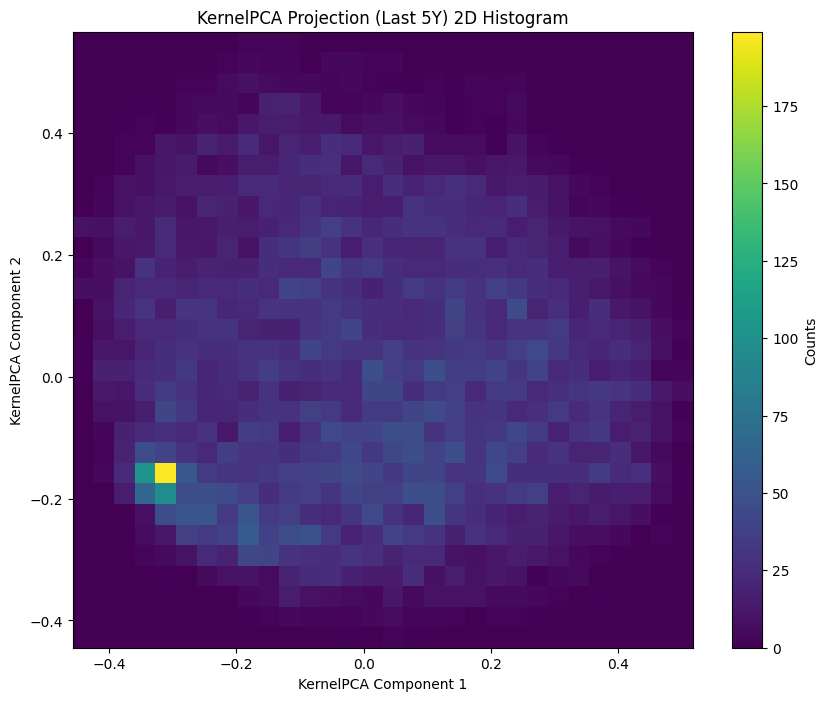

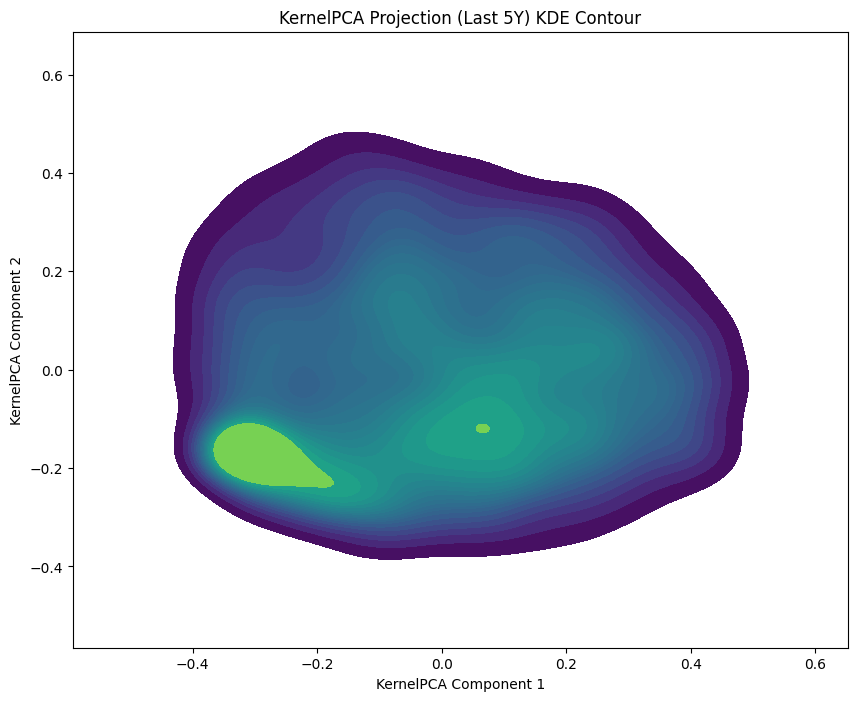

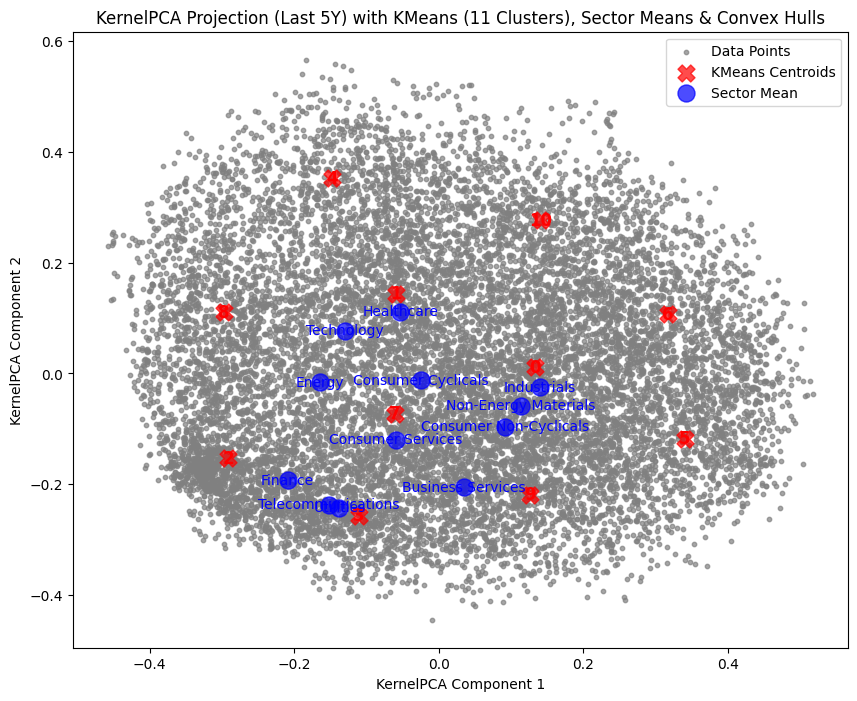

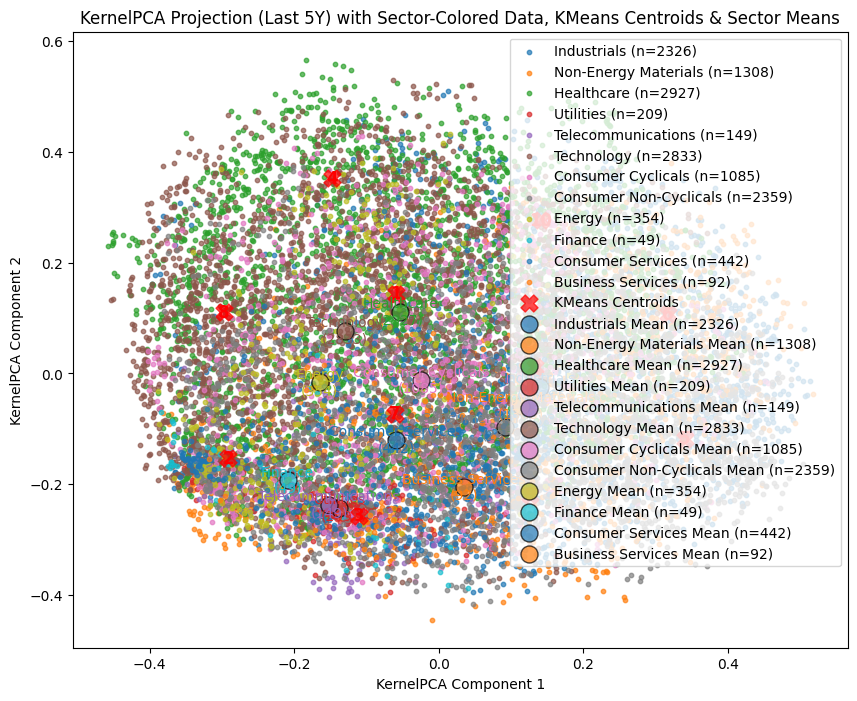

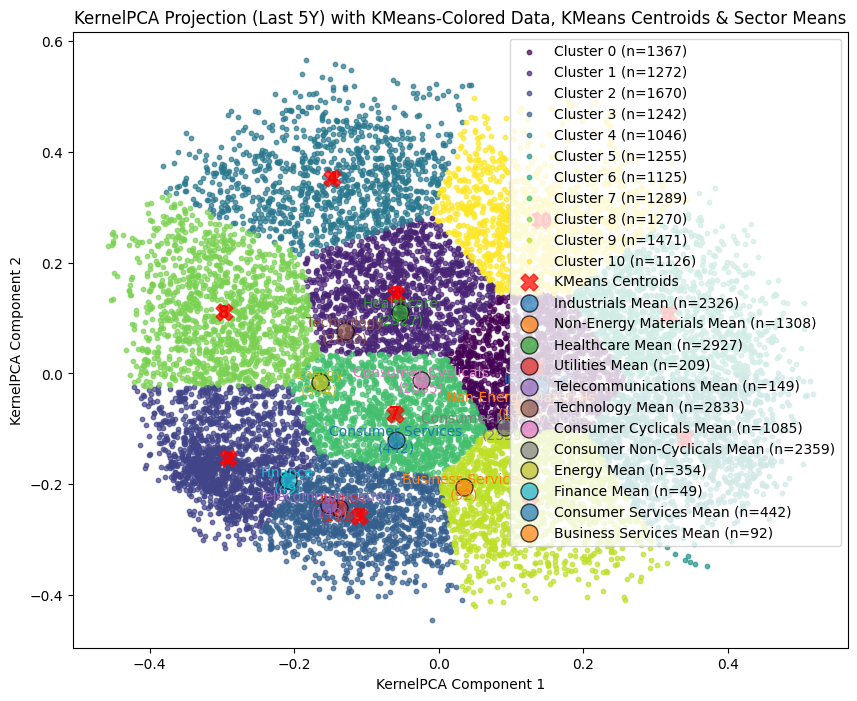

In [155]:
## Code below entirely generated by ChatGPT

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, Isomap
import umap.umap_ as umap
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull

# Define the list of relevant numeric columns
relevant_cols = [
    'Earnings estimate revisions', 'Earnings Estimate Stability', 'Asset turnover', 
    'Inventory turnover', 'Revenue / Employee', 'R&D to book value', 'Dividend payout ratio',
    'Analyst Expected Long Term Growth %', 'Stable EBITDA Growth Rate', 'Stable Sales Growth Rate',
    'Depreciation & Amortization Ratio', 'Equity Issuance Growth', 'Equity Buyback Ratio',
    '36M Beta', '36M Up Market Beta', '36M Down Market Beta', '36M Residual Momentum',
    'EBIT margin', 'Return on invested capital', 'Gross margin', 'Tax burden', 'Altman Z-Score',
    'EPS Stability', 'Market share - sector', 'Current ratio', 'Financial leverage',
    '60M Drawdown', 'Book to price', 'Dividend yield', 'Earnings yield',
    'Free cash flow yield', '60M Residual Volatility', '60M Kurtosis'
]

# Convert 'date' column to datetime and filter for the last 5 years
df_adjusted['date'] = pd.to_datetime(df_adjusted['date'])
cutoff_date = pd.Timestamp.today() - pd.DateOffset(years=25)  # Adjust the window here
df_recent = df_adjusted[df_adjusted['date'] >= cutoff_date]

# Select only the relevant columns plus the sector label, and drop rows with missing values
df_features_full = df_recent[relevant_cols + ['FR RBICS Name Economy']].dropna()

# Separate the sector labels and the numeric features
labels = df_features_full['FR RBICS Name Economy']
df_features = df_features_full[relevant_cols]

# Standardize the numeric features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_features)

# Compute dimensionality reduction projections

# 1. PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# 2. t-SNE: use max_iter instead of n_iter to fix the FutureWarning
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_result = tsne.fit_transform(features_scaled)

# 3. UMAP (warning about n_jobs is benign)
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(features_scaled)

# 4. Isomap: increase n_neighbors to reduce connected components warning
isomap = Isomap(n_components=2, n_neighbors=10)
isomap_result = isomap.fit_transform(features_scaled)

# 5. KernelPCA (with RBF kernel)
kpca = KernelPCA(n_components=2, kernel='rbf', random_state=42)
kpca_result = kpca.fit_transform(features_scaled)

# Helper function for 2D histogram plots.
def plot_hist2d(data, method_name, xlabel, ylabel):
    plt.figure(figsize=(10, 8))
    plt.hist2d(data[:, 0], data[:, 1], bins=30, cmap='viridis')
    plt.title(f'{method_name} Projection (Last 5Y) 2D Histogram')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar(label='Counts')
    plt.show()

# Helper function for KDE contour plots.
def plot_kde(data, method_name, xlabel, ylabel):
    plt.figure(figsize=(10, 8))
    sns.kdeplot(x=data[:, 0], y=data[:, 1], cmap='viridis', fill=True, thresh=0.05, levels=20)
    plt.title(f'{method_name} Projection (Last 5Y) KDE Contour')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# -------------- Scatter Plot Functions ------------------

# (A) Generic scatter plot with overlays (gray dots) – includes convex hull boundaries.
def plot_scatter_with_overlays(data, method_name, xlabel, ylabel, labels, n_clusters=11, point_color='gray'):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    kmeans_centers = kmeans.cluster_centers_
    
    df_proj = pd.DataFrame(data, columns=['Dim1', 'Dim2'])
    df_proj['Sector'] = labels.values
    df_proj['Cluster'] = clusters
    
    # Print counts for both sectors and clusters
    sector_counts = df_proj['Sector'].value_counts()
    cluster_counts = df_proj['Cluster'].value_counts()
    
    plt.figure(figsize=(10, 8))
    plt.scatter(data[:, 0], data[:, 1], color=point_color, alpha=0.7, s=10, label='Data Points')
    
    # Overlay KMeans centroids (red X markers)
    plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], color='red', marker='X', s=150, alpha=0.7, label='KMeans Centroids')
    for i, (cx, cy) in enumerate(kmeans_centers):
        plt.text(cx, cy, str(i), fontsize=12, fontweight='bold', ha='center', va='center', color='red')
    
    # Overlay sector means (using a fixed blue here)
    sector_means = df_proj.groupby('Sector')[['Dim1', 'Dim2']].mean().reset_index()
    for i, row in sector_means.iterrows():
        plt.scatter(row['Dim1'], row['Dim2'], color='blue', marker='o', s=150, alpha=0.7, label='Sector Mean' if i == 0 else "")
        plt.text(row['Dim1'], row['Dim2'], f"{row['Sector']}", fontsize=10, ha='center', va='center', color='blue')
    
    plt.title(f'{method_name} Projection (Last 5Y) with KMeans (11 Clusters), Sector Means & Convex Hulls')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# (B) Scatter plot with overlays – sector-colored dots.
def plot_scatter_with_sector_color(data, method_name, xlabel, ylabel, labels, n_clusters=11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    kmeans_centers = kmeans.cluster_centers_
    
    df_proj = pd.DataFrame(data, columns=['Dim1', 'Dim2'])
    df_proj['Sector'] = labels.values
    df_proj['Cluster'] = clusters
    
    # Print counts per sector
    sector_counts = df_proj['Sector'].value_counts()
    
    # Generate a palette mapping for sectors
    unique_sectors = df_proj['Sector'].unique()
    palette = dict(zip(unique_sectors, sns.color_palette("tab10", n_colors=len(unique_sectors))))
    
    plt.figure(figsize=(10, 8))
    # Plot each sector's points with its assigned color and annotate with count
    for sector in unique_sectors:
        subset = df_proj[df_proj['Sector'] == sector]
        plt.scatter(subset['Dim1'], subset['Dim2'], color=palette[sector], alpha=0.7, s=10, 
                    label=f'{sector} (n={subset.shape[0]})')
    
    # Overlay KMeans centroids (red X markers)
    plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], color='red', marker='X', s=150, alpha=0.7, label='KMeans Centroids')
    for i, (cx, cy) in enumerate(kmeans_centers):
        plt.text(cx, cy, str(i), fontsize=12, fontweight='bold', ha='center', va='center', color='red')
    
    # --- Remove convex hull boundaries in this plot as requested ---
    
    # Overlay sector means – compute and plot each sector's mean with its corresponding color
    for sector in unique_sectors:
        subset = df_proj[df_proj['Sector'] == sector]
        mean_x = subset['Dim1'].mean()
        mean_y = subset['Dim2'].mean()
        count = subset.shape[0]
        plt.scatter(mean_x, mean_y, color=palette[sector], marker='o', s=150, alpha=0.7, edgecolor='black',
                    label=f'{sector} Mean (n={count})')
        plt.text(mean_x, mean_y, f"{sector}\n({count})", fontsize=10, ha='center', va='center', color=palette[sector])
    
    plt.title(f'{method_name} Projection (Last 5Y) with Sector-Colored Data, KMeans Centroids & Sector Means')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# (C) Scatter plot with overlays – KMeans-colored dots.
def plot_scatter_with_kmeans_color(data, method_name, xlabel, ylabel, labels, n_clusters=11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    kmeans_centers = kmeans.cluster_centers_
    
    df_proj = pd.DataFrame(data, columns=['Dim1', 'Dim2'])
    df_proj['Cluster'] = clusters
    df_proj['Sector'] = labels.values
    
    # Print counts per cluster
    cluster_counts = df_proj['Cluster'].value_counts()
    
    plt.figure(figsize=(10, 8))
    cmap = plt.get_cmap('viridis', n_clusters)
    # Plot points by cluster with their counts in the label
    for cluster in range(n_clusters):
        subset = df_proj[df_proj['Cluster'] == cluster]
        plt.scatter(subset['Dim1'], subset['Dim2'], color=cmap(cluster), alpha=0.7, s=10,
                    label=f'Cluster {cluster} (n={subset.shape[0]})')
    
    # Overlay KMeans centroids (red X markers)
    plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], color='red', marker='X', s=150, alpha=0.7, label='KMeans Centroids')
    for i, (cx, cy) in enumerate(kmeans_centers):
        plt.text(cx, cy, str(i), fontsize=12, fontweight='bold', ha='center', va='center', color='red')
    
    # --- Remove convex hull boundaries in this plot as requested ---
    
    # Overlay sector means – now use the same palette as in the sector-colored plot
    unique_sectors = df_proj['Sector'].unique()
    palette = dict(zip(unique_sectors, sns.color_palette("tab10", n_colors=len(unique_sectors))))
    
    for sector in unique_sectors:
        subset = df_proj[df_proj['Sector'] == sector]
        mean_x = subset['Dim1'].mean()
        mean_y = subset['Dim2'].mean()
        count = subset.shape[0]
        plt.scatter(mean_x, mean_y, color=palette[sector], marker='o', s=150, alpha=0.7, edgecolor='black',
                    label=f'{sector} Mean (n={count})')
        plt.text(mean_x, mean_y, f"{sector}\n({count})", fontsize=10, ha='center', va='center', color=palette[sector])
    
    plt.title(f'{method_name} Projection (Last 5Y) with KMeans-Colored Data, KMeans Centroids & Sector Means')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Dictionary mapping each method to its projection data and axis labels.
projections = {
    'PCA':       {'data': pca_result,    'xlabel': 'Principal Component 1', 'ylabel': 'Principal Component 2'},
    't-SNE':     {'data': tsne_result,   'xlabel': 't-SNE Component 1',       'ylabel': 't-SNE Component 2'},
    'UMAP':      {'data': umap_result,   'xlabel': 'UMAP Component 1',        'ylabel': 'UMAP Component 2'},
    'Isomap':    {'data': isomap_result, 'xlabel': 'Isomap Component 1',      'ylabel': 'Isomap Component 2'},
    'KernelPCA': {'data': kpca_result,   'xlabel': 'KernelPCA Component 1',   'ylabel': 'KernelPCA Component 2'}
}

# For each projection method, generate the plots.
for method, info in projections.items():
    data = info['data']
    xlabel = info['xlabel']
    ylabel = info['ylabel']
    
    # 1. 2D Histogram
    plot_hist2d(data, method, xlabel, ylabel)
    
    # 2. KDE Contour Plot
    plot_kde(data, method, xlabel, ylabel)
    
    # 3. Scatter Plot with overlays (gray dots)
    plot_scatter_with_overlays(data, method, xlabel, ylabel, labels, n_clusters=11)
    
    # 4. Scatter Plot with overlays (sector-colored dots)
    plot_scatter_with_sector_color(data, method, xlabel, ylabel, labels, n_clusters=11)
    
    # 5. Scatter Plot with overlays (KMeans-colored dots)
    plot_scatter_with_kmeans_color(data, method, xlabel, ylabel, labels, n_clusters=11)
